In [1]:
%matplotlib inline

In [2]:
import sys
sys.path.append("..")

import tensorflow as tf
import lucid
import atari_zoo
from atari_zoo import MakeAtariModel

tf2onnx not installed, you will not be able to export to onnx


## First convolutional layer filter analysis

This notebook demonstrates an analysis of the first convolutional layer filter weights across different deep reinforcement learning algorithms and games.

In [3]:
#the six algorithms currently included in the zoo
algos = ['a2c','es','ga','apex','rainbow','dqn']

#Let's have better titles
title_dict = {'a2c':'A2C','apex':'Ape-X','ga':'GA','rainbow':'Rainbow','dqn':'DQN','es':'ES'}

In [4]:
from atari_zoo import game_list
from atari_zoo import analysis_subset_games

In [5]:
#Load in models and weights for the game Venture

game_idx = 2 #11
run_id = 1
env = analysis_subset_games[game_idx]

print(env)

weight_dict = {}
for algo in algos:
    for run_id in [1,2,3]:
        tf.reset_default_graph()
        session = atari_zoo.utils.get_session()

        #make atari model for algo + environment+ run combo
        local=False
        m = MakeAtariModel(algo,env,run_id,local=local)()
        
        #load in model
        m.load_graphdef()
        m.import_graph()

        #cache weights in this dictionary for future analysis
        weight_dict[(algo,run_id,)]=m.get_weights(session,0)

AsterixNoFrameskip-v4
Model path: https://dgqeqexrlnkvd.cloudfront.net/zoo/a2c/AsterixNoFrameskip-v4/model1_final.pb
Data path: https://dgqeqexrlnkvd.cloudfront.net/zoo/a2c/AsterixNoFrameskip-v4/model1_final_rollout.npz
Log path: https://dgqeqexrlnkvd.cloudfront.net/zoo/a2c/checkpoints/AsterixNoFrameskip-v4_1
Model path: https://dgqeqexrlnkvd.cloudfront.net/zoo/a2c/AsterixNoFrameskip-v4/model2_final.pb
Data path: https://dgqeqexrlnkvd.cloudfront.net/zoo/a2c/AsterixNoFrameskip-v4/model2_final_rollout.npz
Log path: https://dgqeqexrlnkvd.cloudfront.net/zoo/a2c/checkpoints/AsterixNoFrameskip-v4_2
Model path: https://dgqeqexrlnkvd.cloudfront.net/zoo/a2c/AsterixNoFrameskip-v4/model3_final.pb
Data path: https://dgqeqexrlnkvd.cloudfront.net/zoo/a2c/AsterixNoFrameskip-v4/model3_final_rollout.npz
Log path: https://dgqeqexrlnkvd.cloudfront.net/zoo/a2c/checkpoints/AsterixNoFrameskip-v4_3
Model path: https://dgqeqexrlnkvd.cloudfront.net/zoo/es/AsterixNoFrameskip-v4/model1_final.pb
Data path: https:

# Plotting a selection of Conv filters

-0.7050736 0.4499853
-0.19968036 0.21985775
-0.2828679 0.26300716
-0.66079605 0.32920772
-0.7577713 0.80321676
-2.2774427 1.8774911


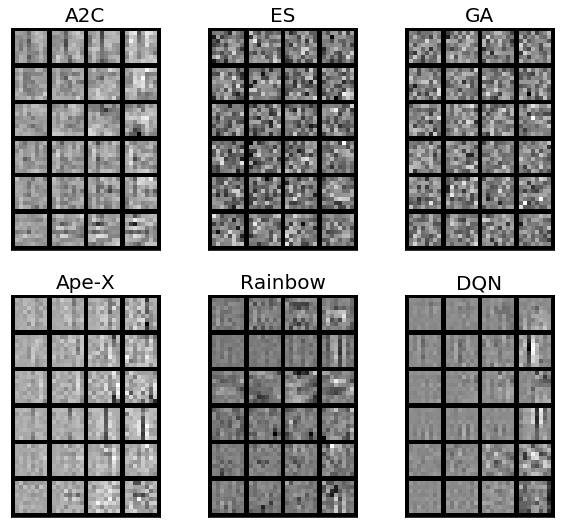

In [6]:
from pylab import *
idx = 0



figure(figsize=(10,9))

#loop across algortihms
for algo in algos:
    subplot(231+idx)
    
    #turn off ticks
    plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False,
    left=False) # labels along the bottom edge are off
    
    plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelleft=False,
    left=False) # labels along the bottom edge are off
    
    #plot conv weights
    atari_zoo.utils.visualize_conv_w(weight_dict[(algo,1)],title=title_dict[algo],subsample=6)
    
    idx+=1

## Do networks pay more attention to the present than past?

Can we quantify how much different networks are paying attention to different input frames by looking at weight magnitudes of input-channel filters?

In [7]:
import collections
import numpy as np

"""
This function looks at how the magnitude of filter weights is distributed across the temporal axis 
of the weights (i.e. the four input channels in Atari are frames nearer and nearer to the present).
"""
def calculate_temporal_lean(w):
    intensity = (w**2).mean(axis=(0,1,-1))
    return intensity

In [8]:
#first gather / calculate results
algo_sum = collections.defaultdict(list)
result = {}

#loop across games
for env in analysis_subset_games:
      
    print(env)
    
    #loop across algos
    weight_dict = {}
    for algo in algos:
        
        #loop across runs
        for run_id in [1,2,3]:
            
            tf.reset_default_graph()
            session = atari_zoo.utils.get_session()

            try:
                #make atari model for algo + environment+ run combo
                m = MakeAtariModel(algo,env,run_id,local=False)()
        
                #load in model
                m.load_graphdef()
                m.import_graph()

                #load in weights
                weight_dict[(algo,run_id,)]=m.get_weights(session,0)
                
                #store analysis result
                algo_sum[(env,algo)].append(calculate_temporal_lean(weight_dict[(algo,run_id)]))  
            except:
                print((algo,env,run_id)," failed")
        
        #average over runs for one algorithm
        result[(env,algo)] = np.vstack(algo_sum[(env,algo)]).mean(axis=0)
        


AmidarNoFrameskip-v4
Model path: https://dgqeqexrlnkvd.cloudfront.net/zoo/a2c/AmidarNoFrameskip-v4/model1_final.pb
Data path: https://dgqeqexrlnkvd.cloudfront.net/zoo/a2c/AmidarNoFrameskip-v4/model1_final_rollout.npz
Log path: https://dgqeqexrlnkvd.cloudfront.net/zoo/a2c/checkpoints/AmidarNoFrameskip-v4_1
Model path: https://dgqeqexrlnkvd.cloudfront.net/zoo/a2c/AmidarNoFrameskip-v4/model2_final.pb
Data path: https://dgqeqexrlnkvd.cloudfront.net/zoo/a2c/AmidarNoFrameskip-v4/model2_final_rollout.npz
Log path: https://dgqeqexrlnkvd.cloudfront.net/zoo/a2c/checkpoints/AmidarNoFrameskip-v4_2
Model path: https://dgqeqexrlnkvd.cloudfront.net/zoo/a2c/AmidarNoFrameskip-v4/model3_final.pb
Data path: https://dgqeqexrlnkvd.cloudfront.net/zoo/a2c/AmidarNoFrameskip-v4/model3_final_rollout.npz
Log path: https://dgqeqexrlnkvd.cloudfront.net/zoo/a2c/checkpoints/AmidarNoFrameskip-v4_3
Model path: https://dgqeqexrlnkvd.cloudfront.net/zoo/es/AmidarNoFrameskip-v4/model1_final.pb
Data path: https://dgqeqexrl

Model path: https://dgqeqexrlnkvd.cloudfront.net/zoo/apex/AssaultNoFrameskip-v4/model3_final.pb
Data path: https://dgqeqexrlnkvd.cloudfront.net/zoo/apex/AssaultNoFrameskip-v4/model3_final_rollout.npz
Log path: https://dgqeqexrlnkvd.cloudfront.net/zoo/apex/checkpoints/AssaultNoFrameskip-v4_3
Model path: gs://download-dopamine-rl/lucid/rainbow/Assault/1/graph_def.pb
Data path: https://dgqeqexrlnkvd.cloudfront.net/zoo/rainbow/AssaultNoFrameskip-v4/model1_final_rollout.npz
Log path: https://dgqeqexrlnkvd.cloudfront.net/zoo/rainbow/checkpoints/AssaultNoFrameskip-v4_1
Model path: gs://download-dopamine-rl/lucid/rainbow/Assault/2/graph_def.pb
Data path: https://dgqeqexrlnkvd.cloudfront.net/zoo/rainbow/AssaultNoFrameskip-v4/model2_final_rollout.npz
Log path: https://dgqeqexrlnkvd.cloudfront.net/zoo/rainbow/checkpoints/AssaultNoFrameskip-v4_2
Model path: gs://download-dopamine-rl/lucid/rainbow/Assault/3/graph_def.pb
Data path: https://dgqeqexrlnkvd.cloudfront.net/zoo/rainbow/AssaultNoFrameskip-

Model path: https://dgqeqexrlnkvd.cloudfront.net/zoo/es/AsteroidsNoFrameskip-v4/model2_final.pb
Data path: https://dgqeqexrlnkvd.cloudfront.net/zoo/es/AsteroidsNoFrameskip-v4/model2_final_rollout.npz
Log path: https://dgqeqexrlnkvd.cloudfront.net/zoo/es/checkpoints/AsteroidsNoFrameskip-v4_2
Model path: https://dgqeqexrlnkvd.cloudfront.net/zoo/es/AsteroidsNoFrameskip-v4/model3_final.pb
Data path: https://dgqeqexrlnkvd.cloudfront.net/zoo/es/AsteroidsNoFrameskip-v4/model3_final_rollout.npz
Log path: https://dgqeqexrlnkvd.cloudfront.net/zoo/es/checkpoints/AsteroidsNoFrameskip-v4_3
Model path: https://dgqeqexrlnkvd.cloudfront.net/zoo/ga/AsteroidsNoFrameskip-v4/model1_final.pb
Data path: https://dgqeqexrlnkvd.cloudfront.net/zoo/ga/AsteroidsNoFrameskip-v4/model1_final_rollout.npz
Log path: https://dgqeqexrlnkvd.cloudfront.net/zoo/ga/checkpoints/AsteroidsNoFrameskip-v4_1
Model path: https://dgqeqexrlnkvd.cloudfront.net/zoo/ga/AsteroidsNoFrameskip-v4/model2_final.pb
Data path: https://dgqeqexrl

Model path: gs://download-dopamine-rl/lucid/dqn/Atlantis/1/graph_def.pb
Data path: https://dgqeqexrlnkvd.cloudfront.net/zoo/rainbow/AtlantisNoFrameskip-v4/model1_final_rollout.npz
Log path: https://dgqeqexrlnkvd.cloudfront.net/zoo/rainbow/checkpoints/AtlantisNoFrameskip-v4_1
Model path: gs://download-dopamine-rl/lucid/dqn/Atlantis/2/graph_def.pb
Data path: https://dgqeqexrlnkvd.cloudfront.net/zoo/rainbow/AtlantisNoFrameskip-v4/model2_final_rollout.npz
Log path: https://dgqeqexrlnkvd.cloudfront.net/zoo/rainbow/checkpoints/AtlantisNoFrameskip-v4_2
Model path: gs://download-dopamine-rl/lucid/dqn/Atlantis/3/graph_def.pb
Data path: https://dgqeqexrlnkvd.cloudfront.net/zoo/rainbow/AtlantisNoFrameskip-v4/model3_final_rollout.npz
Log path: https://dgqeqexrlnkvd.cloudfront.net/zoo/rainbow/checkpoints/AtlantisNoFrameskip-v4_3
EnduroNoFrameskip-v4
Model path: https://dgqeqexrlnkvd.cloudfront.net/zoo/a2c/EnduroNoFrameskip-v4/model1_final.pb
Data path: https://dgqeqexrlnkvd.cloudfront.net/zoo/a2c/E

Model path: https://dgqeqexrlnkvd.cloudfront.net/zoo/ga/FrostbiteNoFrameskip-v4/model3_final.pb
Data path: https://dgqeqexrlnkvd.cloudfront.net/zoo/ga/FrostbiteNoFrameskip-v4/model3_final_rollout.npz
Log path: https://dgqeqexrlnkvd.cloudfront.net/zoo/ga/checkpoints/FrostbiteNoFrameskip-v4_3
Model path: https://dgqeqexrlnkvd.cloudfront.net/zoo/apex/FrostbiteNoFrameskip-v4/model1_final.pb
Data path: https://dgqeqexrlnkvd.cloudfront.net/zoo/apex/FrostbiteNoFrameskip-v4/model1_final_rollout.npz
Log path: https://dgqeqexrlnkvd.cloudfront.net/zoo/apex/checkpoints/FrostbiteNoFrameskip-v4_1
Model path: https://dgqeqexrlnkvd.cloudfront.net/zoo/apex/FrostbiteNoFrameskip-v4/model2_final.pb
Data path: https://dgqeqexrlnkvd.cloudfront.net/zoo/apex/FrostbiteNoFrameskip-v4/model2_final_rollout.npz
Log path: https://dgqeqexrlnkvd.cloudfront.net/zoo/apex/checkpoints/FrostbiteNoFrameskip-v4_2
Model path: https://dgqeqexrlnkvd.cloudfront.net/zoo/apex/FrostbiteNoFrameskip-v4/model3_final.pb
Data path: htt

Model path: https://dgqeqexrlnkvd.cloudfront.net/zoo/a2c/KangarooNoFrameskip-v4/model2_final.pb
Data path: https://dgqeqexrlnkvd.cloudfront.net/zoo/a2c/KangarooNoFrameskip-v4/model2_final_rollout.npz
Log path: https://dgqeqexrlnkvd.cloudfront.net/zoo/a2c/checkpoints/KangarooNoFrameskip-v4_2
Model path: https://dgqeqexrlnkvd.cloudfront.net/zoo/a2c/KangarooNoFrameskip-v4/model3_final.pb
Data path: https://dgqeqexrlnkvd.cloudfront.net/zoo/a2c/KangarooNoFrameskip-v4/model3_final_rollout.npz
Log path: https://dgqeqexrlnkvd.cloudfront.net/zoo/a2c/checkpoints/KangarooNoFrameskip-v4_3
Model path: https://dgqeqexrlnkvd.cloudfront.net/zoo/es/KangarooNoFrameskip-v4/model1_final.pb
Data path: https://dgqeqexrlnkvd.cloudfront.net/zoo/es/KangarooNoFrameskip-v4/model1_final_rollout.npz
Log path: https://dgqeqexrlnkvd.cloudfront.net/zoo/es/checkpoints/KangarooNoFrameskip-v4_1
Model path: https://dgqeqexrlnkvd.cloudfront.net/zoo/es/KangarooNoFrameskip-v4/model2_final.pb
Data path: https://dgqeqexrlnkvd

Model path: gs://download-dopamine-rl/lucid/rainbow/Seaquest/1/graph_def.pb
Data path: https://dgqeqexrlnkvd.cloudfront.net/zoo/rainbow/SeaquestNoFrameskip-v4/model1_final_rollout.npz
Log path: https://dgqeqexrlnkvd.cloudfront.net/zoo/rainbow/checkpoints/SeaquestNoFrameskip-v4_1
Model path: gs://download-dopamine-rl/lucid/rainbow/Seaquest/2/graph_def.pb
Data path: https://dgqeqexrlnkvd.cloudfront.net/zoo/rainbow/SeaquestNoFrameskip-v4/model2_final_rollout.npz
Log path: https://dgqeqexrlnkvd.cloudfront.net/zoo/rainbow/checkpoints/SeaquestNoFrameskip-v4_2
Model path: gs://download-dopamine-rl/lucid/rainbow/Seaquest/3/graph_def.pb
Data path: https://dgqeqexrlnkvd.cloudfront.net/zoo/rainbow/SeaquestNoFrameskip-v4/model3_final_rollout.npz
Log path: https://dgqeqexrlnkvd.cloudfront.net/zoo/rainbow/checkpoints/SeaquestNoFrameskip-v4_3
Model path: gs://download-dopamine-rl/lucid/dqn/Seaquest/1/graph_def.pb
Data path: https://dgqeqexrlnkvd.cloudfront.net/zoo/rainbow/SeaquestNoFrameskip-v4/model

Model path: https://dgqeqexrlnkvd.cloudfront.net/zoo/es/VentureNoFrameskip-v4/model3_final.pb
Data path: https://dgqeqexrlnkvd.cloudfront.net/zoo/es/VentureNoFrameskip-v4/model3_final_rollout.npz
Log path: https://dgqeqexrlnkvd.cloudfront.net/zoo/es/checkpoints/VentureNoFrameskip-v4_3
Model path: https://dgqeqexrlnkvd.cloudfront.net/zoo/ga/VentureNoFrameskip-v4/model1_final.pb
Data path: https://dgqeqexrlnkvd.cloudfront.net/zoo/ga/VentureNoFrameskip-v4/model1_final_rollout.npz
Log path: https://dgqeqexrlnkvd.cloudfront.net/zoo/ga/checkpoints/VentureNoFrameskip-v4_1
Model path: https://dgqeqexrlnkvd.cloudfront.net/zoo/ga/VentureNoFrameskip-v4/model2_final.pb
Data path: https://dgqeqexrlnkvd.cloudfront.net/zoo/ga/VentureNoFrameskip-v4/model2_final_rollout.npz
Log path: https://dgqeqexrlnkvd.cloudfront.net/zoo/ga/checkpoints/VentureNoFrameskip-v4_2
Model path: https://dgqeqexrlnkvd.cloudfront.net/zoo/ga/VentureNoFrameskip-v4/model3_final.pb
Data path: https://dgqeqexrlnkvd.cloudfront.net/

Model path: gs://download-dopamine-rl/lucid/dqn/Zaxxon/2/graph_def.pb
Data path: https://dgqeqexrlnkvd.cloudfront.net/zoo/rainbow/ZaxxonNoFrameskip-v4/model2_final_rollout.npz
Log path: https://dgqeqexrlnkvd.cloudfront.net/zoo/rainbow/checkpoints/ZaxxonNoFrameskip-v4_2
Model path: gs://download-dopamine-rl/lucid/dqn/Zaxxon/3/graph_def.pb
Data path: https://dgqeqexrlnkvd.cloudfront.net/zoo/rainbow/ZaxxonNoFrameskip-v4/model3_final_rollout.npz
Log path: https://dgqeqexrlnkvd.cloudfront.net/zoo/rainbow/checkpoints/ZaxxonNoFrameskip-v4_3


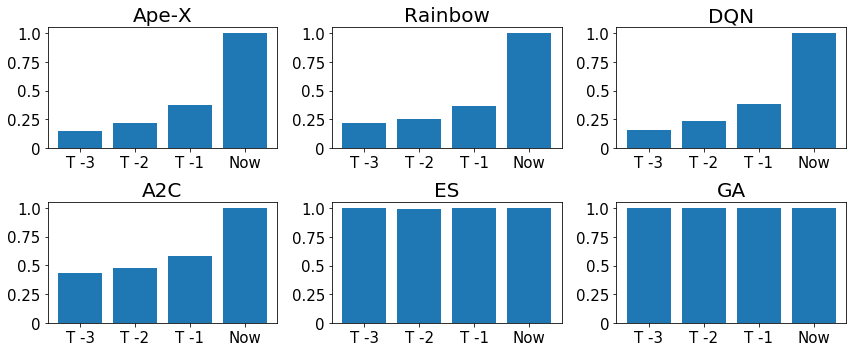

In [9]:
from pylab import *
#now, plot for each algorithm create a bar chart summarizing the results
r_norm = {}

#normalize by the last frame (e.g. let last frame have "1.0" as reference point)
for key in result:
    r_norm[key] = result[key]/result[key][-1]
    
import matplotlib.pyplot as plt

#now average over all the games for each algorithm
avg_intensity = {}
for algo in ['apex','rainbow','dqn','a2c','es','ga']:
    arr = []
    for env in analysis_subset_games:
        intensities = r_norm[(env,algo)]
        arr.append(intensities)
    avg_intensity[algo] = np.vstack(arr).mean(axis=0)
        
        
#make the bar charts
fig = figure(figsize=(12,5))
idx=0
for algo in ['apex','rainbow','dqn','a2c','es','ga']:
    ax=subplot(231+idx)
    ax.bar(x=range(4),height=avg_intensity[algo])
    ax.set_xticks([0,1,2,3])
    ax.set_yticks([0,0.25,0.5,0.75,1.0])
    ax.set_yticklabels([0,0.25,0.5,0.75,1.0],fontsize=15)
    ax.set_xticklabels(('T -3', 'T -2', 'T -1', 'Now'),fontsize=15)
    ax.set_title(title_dict[algo],fontsize=20)
    idx+=1
    
fig.tight_layout()

The gradient based algorithms in general seem to favor the present over the past; interestingly the trend is not present in the evolutionary algorithms.

## Making videos of rollouts

In [4]:
import moviepy.editor as mpy
from moviepy.video.io.ffmpeg_writer import FFMPEG_VideoWriter
from IPython.display import clear_output, Image, display, HTML
from lucid.misc.io.serialize_array import _normalize_array
import numpy as np
from atari_zoo import MakeAtariModel
from atari_zoo.utils import MakeVideo

In [19]:
env = "MontezumaRevengeNoFrameskip-v4"

for algo in algos:
    for run_id in [1,2,3]:
        tf.reset_default_graph()
        session = atari_zoo.utils.get_session()

        #make atari model for algo + environment+ run combo
        m = MakeAtariModel(algo,env,run_id,local=True)()
        video_fn = "%s-%s-%d.mp4" % (algo,env,run_id)
        MakeVideo(m,video_fn=video_fn)
        
        print(env,algo,run_id)



Model path: /space/rlzoo/a2c/MontezumaRevengeNoFrameskip-v4/model1_final.pb
MontezumaRevengeNoFrameskip-v4 a2c 1
Model path: /space/rlzoo/a2c/MontezumaRevengeNoFrameskip-v4/model2_final.pb
MontezumaRevengeNoFrameskip-v4 a2c 2
Model path: /space/rlzoo/a2c/MontezumaRevengeNoFrameskip-v4/model3_final.pb
MontezumaRevengeNoFrameskip-v4 a2c 3
Model path: /space/rlzoo/es/MontezumaRevengeNoFrameskip-v4/model1_final.pb
MontezumaRevengeNoFrameskip-v4 es 1
Model path: /space/rlzoo/es/MontezumaRevengeNoFrameskip-v4/model2_final.pb
MontezumaRevengeNoFrameskip-v4 es 2
Model path: /space/rlzoo/es/MontezumaRevengeNoFrameskip-v4/model3_final.pb
MontezumaRevengeNoFrameskip-v4 es 3
Model path: /space/rlzoo/ga/MontezumaRevengeNoFrameskip-v4/model1_final.pb
MontezumaRevengeNoFrameskip-v4 ga 1
Model path: /space/rlzoo/ga/MontezumaRevengeNoFrameskip-v4/model2_final.pb
MontezumaRevengeNoFrameskip-v4 ga 2
Model path: /space/rlzoo/ga/MontezumaRevengeNoFrameskip-v4/model3_final.pb
MontezumaRevengeNoFrameskip-v4 

In [24]:
clear_output()
display(mpy.ipython_display(video_fn, height=400))


## Making grids of videos

In [25]:
import glob
print (glob.glob("*.mp4"))

['rainbow-SeaquestNoFrameskip-v4-3.mp4', 'apex-SeaquestNoFrameskip-v4-1.mp4', 'ga-PitfallNoFrameskip-v4-3.mp4', 'dqn-SeaquestNoFrameskip-v4-2.mp4', 'dqn-SeaquestNoFrameskip-v4-3.mp4', 'a2c-PitfallNoFrameskip-v4-2.mp4', 'apex-PitfallNoFrameskip-v4-3.mp4', 'rainbow-MontezumaRevengeNoFrameskip-v4-1.mp4', 'rollout_video.mp4', 'a2c-MontezumaRevengeNoFrameskip-v4-3.mp4', 'a2c-SeaquestNoFrameskip-v4-2.mp4', 'a2c-MontezumaRevengeNoFrameskip-v4-1.mp4', 'xy2rgb2.mp4', 'xy2rgb.mp4', 'es-MontezumaRevengeNoFrameskip-v4-2.mp4', 'rainbow-PitfallNoFrameskip-v4-1.mp4', 'dqn-PitfallNoFrameskip-v4-1.mp4', 'es-SeaquestNoFrameskip-v4-1.mp4', 'rainbow-PitfallNoFrameskip-v4-3.mp4', 'a2c-MontezumaRevengeNoFrameskip-v4-2.mp4', 'es-PitfallNoFrameskip-v4-1.mp4', 'apex-SeaquestNoFrameskip-v4-3.mp4', 'dqn-PitfallNoFrameskip-v4-2.mp4', 'rainbow-PitfallNoFrameskip-v4-2.mp4', 'apex-PitfallNoFrameskip-v4-1.mp4', 'a2c-SeaquestNoFrameskip-v4-1.mp4', 'es-MontezumaRevengeNoFrameskip-v4-3.mp4', 'apex-MontezumaRevengeNoFram

In [28]:
importlib.reload(atari_zoo.utils)
from atari_zoo.utils import rollout_grid

clip, clip_dict = rollout_grid(env=env,algos=algos,run_ids=[1,2,3],clip_resize=1.0)

MontezumaRevengeNoFrameskip-v4 a2c 1
MontezumaRevengeNoFrameskip-v4 a2c 2
MontezumaRevengeNoFrameskip-v4 a2c 3
MontezumaRevengeNoFrameskip-v4 es 1
MontezumaRevengeNoFrameskip-v4 es 2
MontezumaRevengeNoFrameskip-v4 es 3
MontezumaRevengeNoFrameskip-v4 ga 1
MontezumaRevengeNoFrameskip-v4 ga 2
MontezumaRevengeNoFrameskip-v4 ga 3
MontezumaRevengeNoFrameskip-v4 apex 1
MontezumaRevengeNoFrameskip-v4 apex 2
MontezumaRevengeNoFrameskip-v4 apex 3
MontezumaRevengeNoFrameskip-v4 rainbow 1
MontezumaRevengeNoFrameskip-v4 rainbow 2
MontezumaRevengeNoFrameskip-v4 rainbow 3
MontezumaRevengeNoFrameskip-v4 dqn 1
MontezumaRevengeNoFrameskip-v4 dqn 2
MontezumaRevengeNoFrameskip-v4 dqn 3
[MoviePy] >>>> Building video composite.mp4
[MoviePy] Writing video composite.mp4


100%|██████████| 2501/2501 [01:13<00:00, 33.83it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: composite.mp4 



In [ ]:
clear_output()
display(mpy.ipython_display("composite.mp4", height=800))